In [1]:
import numpy as np
import matplotlib.pyplot as plt

PUNTO 1


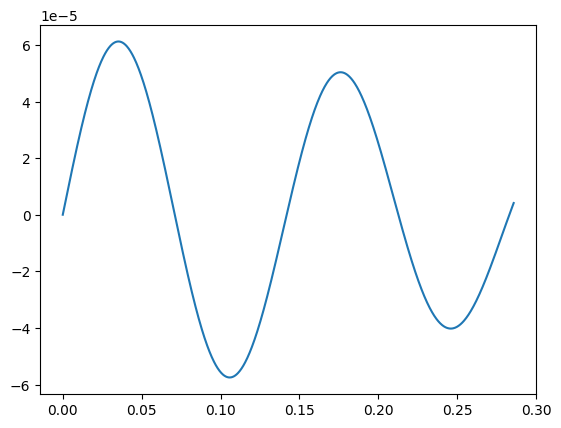

In [2]:
def fun(x):
    return np.pi*0.125**2*0.05*np.cos(3.5*x)*np.cos(2*np.pi*7*x)

def fun2(x):
    return derivadaCen(fun,x)*(-1/1.75e3)

def derivadaCen(f,x,h=1e-6):
    return (f(x+h) - f(x-h))/(2*h)
x = np.linspace(0,2/7,1000)

y = fun2(x)

plt.plot(x,y)

In [3]:
def newton(f,df,xn,itmax=1000,precision=1e-5):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        try:
            xn1 = xn - f(xn)/df(f,xn)
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
    
    return xn

print(newton(fun2,derivadaCen,0.08))
print(newton(fun2,derivadaCen,0.15))
print(newton(fun2,derivadaCen,0.22))

0.07096973562994034
0.1418773621788837
0.2126227073232996


PUNTO 3

In [4]:

import numpy as np

import sympy as sym

import math

from matplotlib import pyplot as plt

def GetLaguerre(n,x):
    
    L_0= sym.Number(1)    
    L_1= 1-x
    
    if n==0:
        
        pol= L_0
        
    elif n==1:
        
        pol= L_1
        
    else:
        
        k=n-1
        
        L_= GetLaguerre(k,x)
        L_1=GetLaguerre(k-1,x)
        
        pol= ((2*k+1-x)*L_-(k*L_1))/(k+1)

        
    return  sym.expand(pol,x)

In [5]:
def LaguerreDiff(Laguerre,x):

    return sym.diff(Laguerre,x,1)


#Función GetNewton del repositorio de la clase 

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn


def GetAllRootsGLag(n):
    
    x=sym.symbols('x')
    raices= np.array([])
    Laguerre= GetLaguerre(n,x) 
    Laguerredif= LaguerreDiff(Laguerre,x) 
    
   
    
    para=n+((n-1)*(n**(1/2)))
    
    xns = np.linspace(0,para,500)
    
    for xn in xns:
           
        raiz=GetNewton( sym.lambdify(x,Laguerre,'numpy'),sym.lambdify(x,Laguerredif,'numpy'),xn)

        if  type(raiz)!=bool and not np.any(np.isclose(raices, raiz, atol=1e-4)):

            
            raices= np.append(raices, raiz)
            
    raices.sort()
    

    if len(raices) != n:
        ValueError('El número de raíces debe ser igual al n del polinomio.')
   
    return raices

In [6]:
def peso(n,x,p):

    a= (n+1)**2
    b=(sym.lambdify(p,GetLaguerre(n+1,p),'numpy')(x))**2
     
    return(x/(a*b))

def GetWeightsGLag(n):
    
    x=sym.symbols('x')
    raices= GetAllRootsGLag(n)
    pesos=np.array([])
    
    for i in range(n):
        pesos=np.append(pesos,peso(n,raices[i],x))
    
    return pesos

In [7]:
def GetHermite(n,x):

    H_0= sym.Number(1)    
    H_1= 2*x
    
    if n==0:
        
        pol= H_0
        
    elif n==1:
        
        pol= H_1
        
    else:
        
        k=n-1
        
        H_= GetHermite(k,x)
        H_d=sym.diff(H_,x,1)
        
        pol= ((2*x*H_)-H_d)
    
    return  sym.expand(pol,x)

In [8]:
def GetAllRootsGHer(n):
        
        x=sym.symbols('x')
        
        raices= np.array([])
        Hermite= GetHermite(n,x) 
        Hermitedif= LaguerreDiff(Hermite,x) 
        
    
        
        para=((4+n)**(1/2))

        
        xns = np.linspace((-1)*para,para,100)
        
        for xn in xns:
            
            raiz=GetNewton( sym.lambdify(x,Hermite,'numpy'),sym.lambdify(x,Hermitedif,'numpy'),xn)
            
            
    
            if  type(raiz)!=bool and not np.any(np.isclose(raices, raiz, atol=1e-3)):
    
                
                raices= np.append(raices, raiz)
                
        raices.sort()
        
    
        if len(raices) != n:
             ValueError('El número de raíces debe ser igual al n del polinomio.')
    
        return raices

In [9]:
def pesoH(n,x,p):

    a= 2**(n-1)
    b= math.factorial(n)
    c=((np.pi)**(1/2))
    d=n**2
    e= (sym.lambdify(p,GetHermite(n-1,p),'numpy')(x))**2
     
    return((a*b*c)/(d*e))

def GetWeightsGHer(n):
        
        x=sym.symbols('x')
        raices= GetAllRootsGHer(n)
        pesos=np.array([])
        
        for i in range(n):
            pesos=np.append(pesos,pesoH(n,raices[i],x))
        
        return pesos

In [10]:
def GaussLaguerre(n,f):

    sum=0

    pesos= GetWeightsGLag(n)

    raices= GetAllRootsGLag(n)

    for i in range(n):

       sum+=(pesos[i]*f(raices[i]))

    return sum


def MaxwellProb(v):
    return (2/(np.pi**(1/2)))*(v**(1/2))


print(GaussLaguerre(10,lambda x: MaxwellProb(x)))

1.0036929297451158


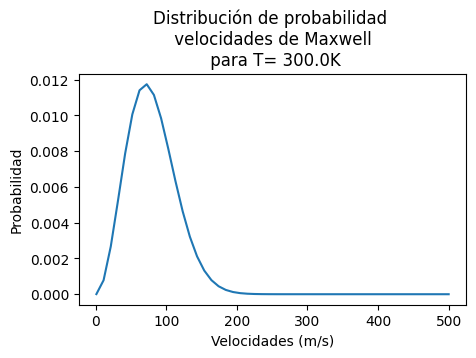

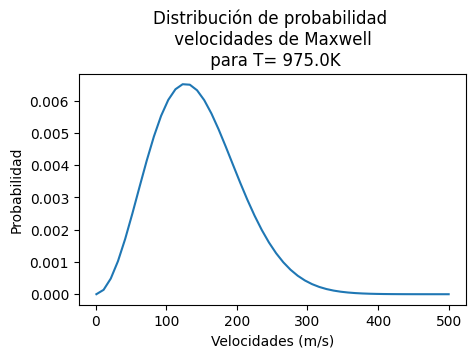

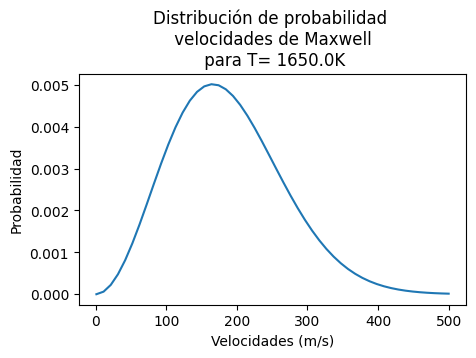

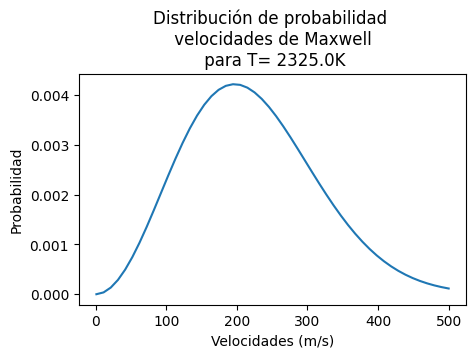

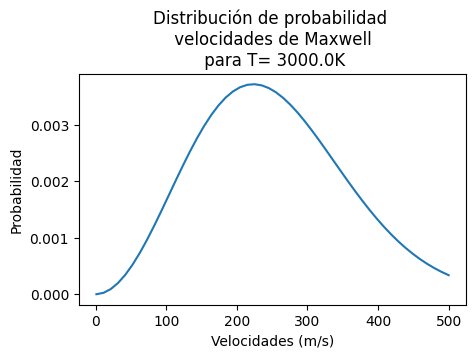

In [11]:
def Maxwell(v,T):

    R=8.314
    a= (1/(2*np.pi*T*R))**(3/2)
    b= (np.exp(((-1)*(v**2))/(2*T*R)))
    return(4*np.pi*a*(v**2)*b)


temperaturas= np.linspace(300,3000,5)
velocidades= np.linspace(1,500)


def graficar_y(velocidades,T):
    maxwelss= np.array([])
    for i in velocidades:
        maxwelss=np.append(maxwelss,Maxwell(i,T))

    return maxwelss

for j in temperaturas:

    plt.figure(figsize=(5, 3))
    plt.plot(velocidades, graficar_y(velocidades,j))
    plt.xlabel('Velocidades (m/s)')
    plt.ylabel('Probabilidad')
    plt.title('Distribución de probabilidad \n velocidades de Maxwell \n para T= '+str(j)+'K')

    plt.show()



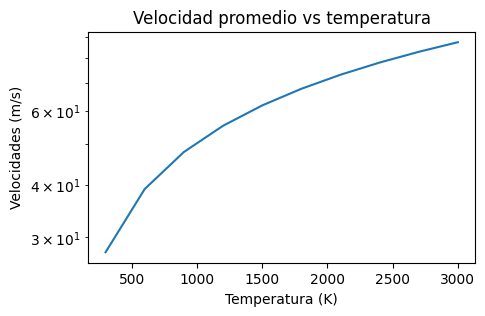

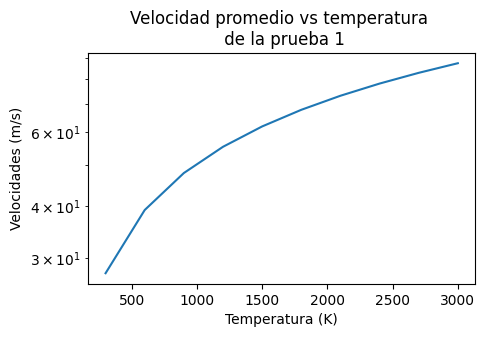

In [12]:
temperaturas= np.linspace(300,3000,10)

def Maxwellv(v,T):

    
    a= 2/(np.pi**(1/2))
    b=(2*T)**(1/2)

    return a*b*v


def velocidad_promedio(T):
    return GaussLaguerre(5, lambda v: Maxwellv(v,T))

def graficar_yp(T):
    maxwelss= np.array([])
    for i in T:
        maxwelss=np.append(maxwelss,velocidad_promedio(i))

    return maxwelss


plt.figure(figsize=(5, 3))
plt.plot(temperaturas, graficar_yp(temperaturas))
plt.yscale('log')
plt.xlabel('Temperatura (K)')
plt.ylabel('Velocidades (m/s)')
plt.title('Velocidad promedio vs temperatura')

plt.show()

def prueba1(T):

    maxwelss= np.array([])
    
    for i in T:
        f=((8*i)/(np.pi))**(1/2)
        maxwelss=np.append(maxwelss,f)

    return maxwelss



plt.figure(figsize=(5, 3))
plt.plot(temperaturas, prueba1(temperaturas))
plt.yscale('log')
plt.xlabel('Temperatura (K)')
plt.ylabel('Velocidades (m/s)')
plt.title('Velocidad promedio vs temperatura \n de la prueba 1')

plt.show()


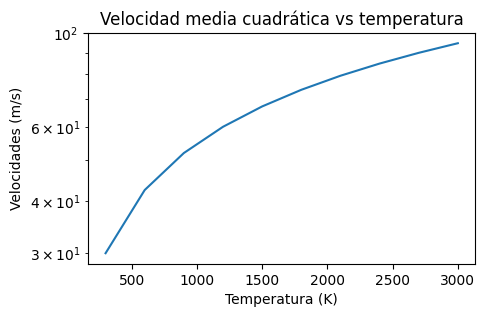

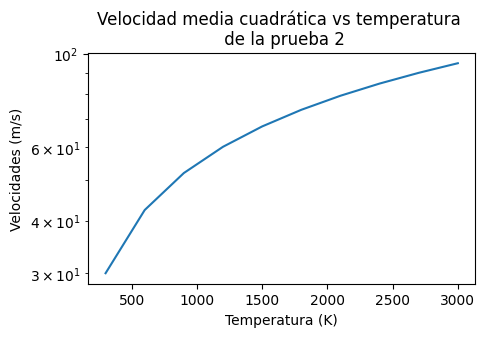

In [13]:
temperaturas= np.linspace(300,3000,10)


def Maxwellvrms(v,T):

    a=4*(np.pi**(-1/2))
    b=v**(3/2)
    return (a*T*b)


def velocidad_rms(T):
    return (GaussLaguerre(5, lambda v: Maxwellvrms(v,T)))**(1/2)


def graficar_yrms(T):
    maxwelss= np.array([])
    for i in T:
        maxwelss=np.append(maxwelss,velocidad_rms(i))

    return maxwelss

plt.figure(figsize=(5, 3))
plt.plot(temperaturas, graficar_yrms(temperaturas))
plt.yscale('log')
plt.xlabel('Temperatura (K)')
plt.ylabel('Velocidades (m/s)')
plt.title('Velocidad media cuadrática vs temperatura')

plt.show()


def prueba2(T):
    
        maxwelss= np.array([])
        
        for i in T:
            f=(3*i)**(1/2)
            maxwelss=np.append(maxwelss,f)
    
        return maxwelss




plt.figure(figsize=(5, 3))
plt.plot(temperaturas, prueba2(temperaturas))
plt.yscale('log')
plt.xlabel('Temperatura (K)')
plt.ylabel('Velocidades (m/s)')
plt.title('Velocidad media cuadrática vs temperatura \n de la prueba 2')

plt.show()

PUNTO 4

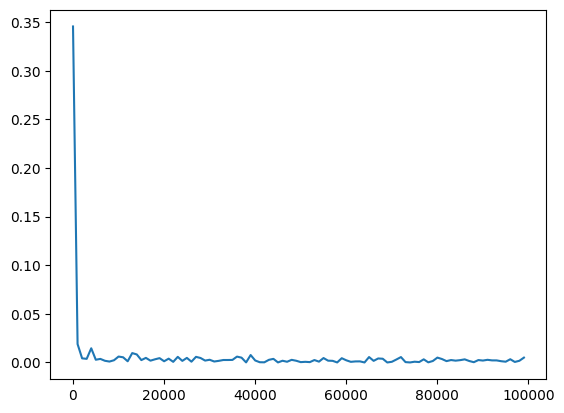

In [14]:
a = 0
b = np.pi
real =0.52161 
error = []
enes = []

def fun(x):
    return (np.exp(-x)*np.sin(x))

for i in range(10,100000,1000):
    x = np.random.uniform(a,b,i)
    y = fun(x)
    valor = (b-a)*sum(y)/i
    dif = np.abs(real-valor)/real
    error.append(dif)
    enes.append(i)

plt.plot(enes,error)

In [15]:
#4.2

# se pasará a esfericas la integral 

N = 100000

def fun1(o):
    return o/o
def fun2(phi):
    return np.sin(phi)
def fun3(x):
    return np.sin(x**2)*np.exp(x**2)*x**2


x1 = np.random.uniform(0.0000001,2*np.pi,N)
x2 = np.random.uniform(0,np.pi,N)
x3 = np.random.uniform(0,1,N)
y1,y2,y3 = fun1(x1), fun2(x2), fun3(x3)


valor = ((2*np.pi)*sum(y1)/N)*((np.pi)*sum(y2)/N)*((1)*sum(y3)/N)

valor

4.740567263496751